In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect 

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [9]:
# Save references to each table
Station = Base.classes.station 
Measurement= Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)
inspector = inspect(engine)
inspector.get_table_names()
columns=inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
  columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()



('2017-08-23',)

In [13]:
end = session.query(Measurement.date).order_by(Measurement.date.asc()).first()
end

('2010-01-01',)

In [16]:
start = '2010-01-01'
end=  '2017-08-23'
results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
              filter(Measurement.date>= start).filter(Measurement.date <= end).all()
data =[{"TMIN": result[0], "TAVG": result[1], "TMAX": result[2]} for result in results]
print (results)

[(53.0, 73.09795396419437, 87.0)]


# Exploratory Precipitation Analysis

Text(0, 0.5, 'Inches')

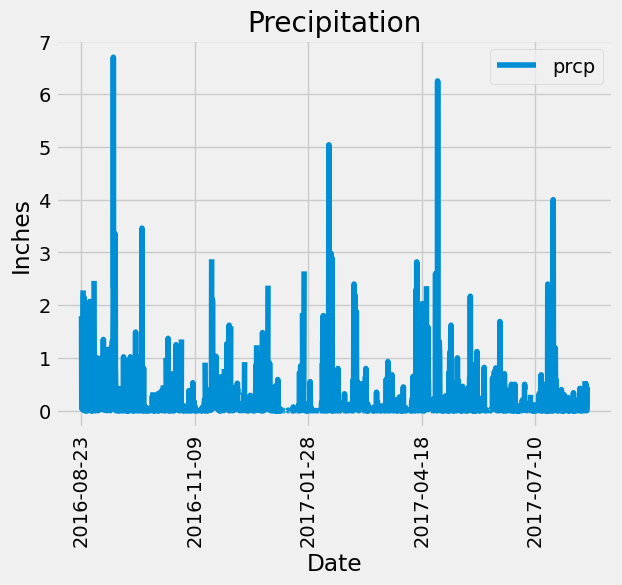

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
recent_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Months= recent_date - dt  (days=365)

# precipitation_data = session.query(map.Measurement, Measurement.precipitation)\
    # .filter(Measurement.date > Months, Measurement.date < recent_date)\
    # .order_by(Measurement.date).all()

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year= dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

scores= session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=one_year).all()



# Save the query results as a Pandas DataFrame. Explicitly set the column names

df= pd.DataFrame (scores)

# Sort the dataframe by date
sorted= df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
sorted.plot(x='date', y='prcp',rot=90)
plt.title('Precipitation')
plt.xlabel("Date")
plt.ylabel("Inches")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()




,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()


[(9,)]

In [ ]:


# Assuming Measurement is the name of your SQLAlchemy model for the measurements table
# Replace Measurement with your actual model name if it's different

# Perform the query to find the most active stations
active = session.query(Measurement.station, func.count(Measurement.station))\
                         .group_by(Measurement.station)\
                         .order_by(func.count(Measurement.station).desc())\
                         .all()

# Print the list of stations and their row counts in descending order
print("Most active stations:")
for station, count in active:
    print(f" {station}, Count: {count}")


Most active stations:
 USC00519281, Count: 2772
 USC00519397, Count: 2724
 USC00513117, Count: 2709
 USC00519523, Count: 2669
 USC00516128, Count: 2612
 USC00514830, Count: 2202
 USC00511918, Count: 1979
 USC00517948, Count: 1372
 USC00518838, Count: 511


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Query for the maximum temperature
max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').scalar()

# Query for the average temperature
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').scalar()

# Query for the minimum temperature
min = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').scalar()

# Print the results
print(max)
print(avg)
print(min)




85.0
71.66378066378067
54.0


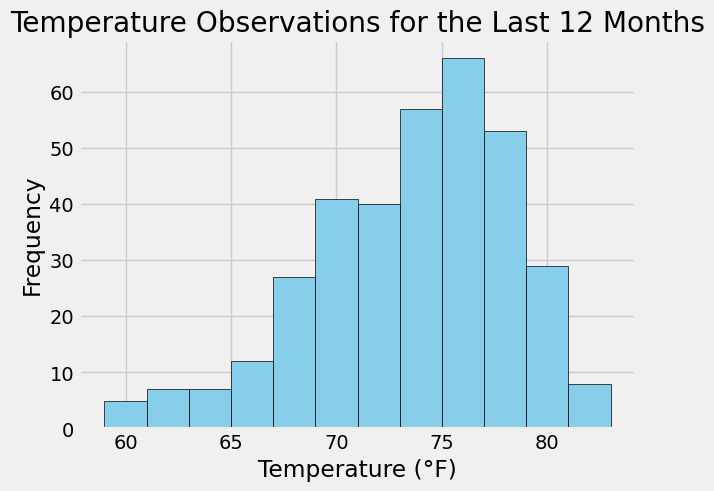

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
    filter(Measurement.station =='USC00519281').\
    filter(Measurement.date>=one_year).all()
temperatures = [result[0] for result in results]
plt.hist(temperatures, bins=12, color='skyblue', edgecolor='black')
plt.title('Temperature Observations for the Last 12 Months')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Close Session

In [ ]:
# Close Session
session.close()